# Hackaton RTT  - ML

## Run the experiment
The experiment consists on several HTTP downloads of files with different file sizes, from 1M to 50M.
For every flow, the RTT is measured, and the RTT estimator estimates the RTT.

To simulate the network we have used mininet, with three nodes: One client running aria2c to download, a router running our sniffer and performing the RTT measurements and estimations, and a server running nginx as a HTTP server.

The tests we have performed are the following:

* Test 1: Our RTT Machine learning algorithm with evenly distributed experts
  * Parameters: 
     * experts: 100
     * rtt min: 2
     * rtt max: 500
     * learning rate: 2
     * share rate: 0.008
* Test 2: Legacy RTT algorithm with alpha = 0.5
* Test 4: Legacy RTT algorithm with alpha = 0.2
* Test 4: Our RTT Machine learning algorithm with exponentially distributed experts (More experts with lower rtts)
  * Parameters: 
     * experts: 100
     * rtt min: 2
     * rtt max: 500
     * learning rate: 2
     * share rate: 0.008



##  Load data

Each experiment dumps RTT measured and RTT estimated in a CSV file per flow

In [166]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

plt.rcParams['figure.figsize'] = [15, 5]

def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

def get_rtts(dir):
    files = [f for f in listdir(dir) if isfile(join(dir, f))]
    rtts = [np.loadtxt(join(dir,f), delimiter=',') for f in files]
    rtts_measured = [rtt[:,0] for rtt in rtts]
    rtts_estimated = [rtt[:,1] for rtt in rtts]
    return (rtts_measured, rtts_estimated, rtts)

def get_error(rtts):
    err = [ np.mean(np.abs(rtt[:,0] - rtt[:,1])) for rtt in rtts]
    return err
        
def plot_rtts(path):
    rtts_measured, rtts_estimated, rtts = get_rtts(path)
    plt.subplot(1,2,1)
    for i,rtt in enumerate(rtts_measured):
        if len(rtt)>300:
            plt.plot(reject_outliers(rtt),'o-', label=i)
        plt.legend()
    plt.title("RTT Measured")

    plt.subplot(1,2,2)
    for i,rtt in enumerate(rtts_estimated):
        if len(rtt) > 300:
            plt.plot(rtt,'o-', label=i)
        plt.legend()
    plt.title("RTT Estimated")



## Error Measurement
The error for each flow is measured using the mean squared error. The blue line is the average of all flows

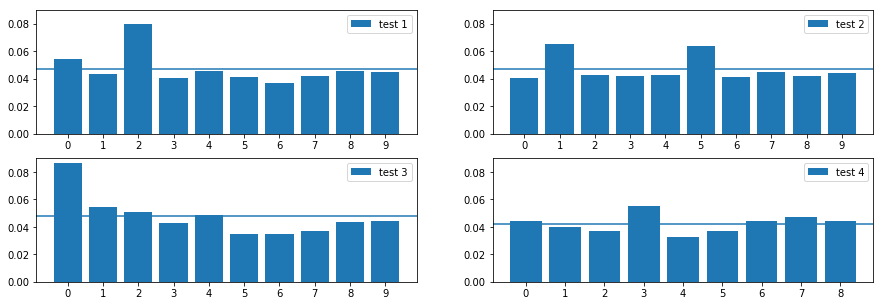

In [191]:

for test in range(1,5):
    plt.subplot(2,2,test)
    rtts_measured, rtts_estimated, rtts = get_rtts("results_{0}".format(test))
    err = get_error(rtts)
    ind = np.arange(0, len(err), 1)
    plt.bar(ind,err, label="test {0}".format(test));
    plt.legend()
    plt.xticks(ind);
    plt.axhline(y=np.mean(err));
    plt.ylim(ymax=0.09)





### RTT Machine Learning with evenly distributed experts

In general, the RTT estimated is very stable once it has converged. It needs a few loops to converge, and after that follows the average RTT measured.

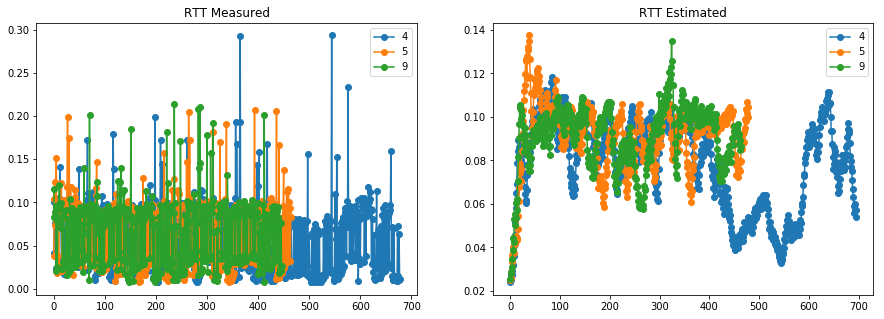

In [167]:
plot_rtts("results_1") # RTT ML

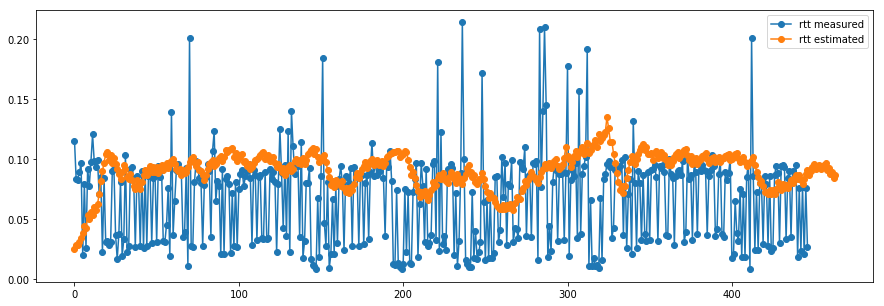

In [176]:
rtts_measured, rtts_estimated, rtts = get_rtts("results_1")

#plt.subplot(1,2,1)
plt.plot(reject_outliers(rtts_measured[9]), 'o-', label="rtt measured");
#plt.legend();

#plt.subplot(1,2,2)
plt.plot(rtts_estimated[9], 'o-', label="rtt estimated");
plt.legend();

### RTT Estimator legacy with alpha = 0.5

The problem with the legacy RTT estimator is that it not stable, depending on the point it could be too high or too low. In the next experiment we tried to use a lower alpha to smooth the estimation

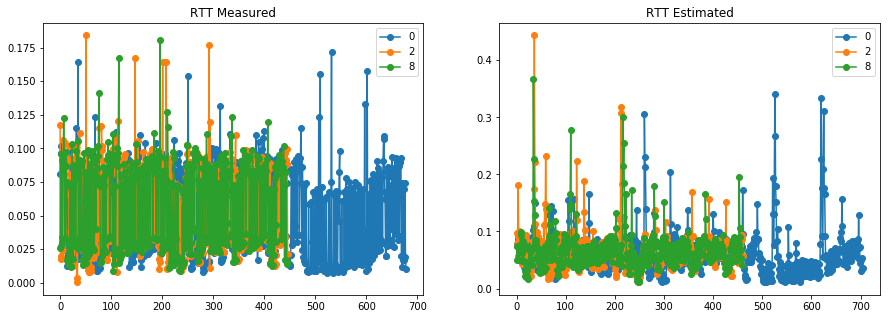

In [169]:
plot_rtts("results_2") # alpha = 0.5

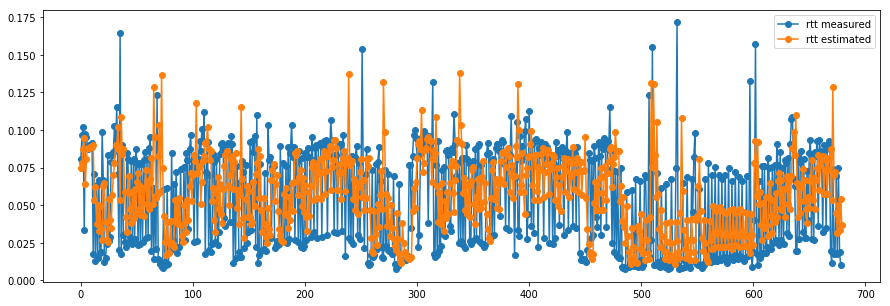

In [178]:
rtts_measured, rtts_estimated, rtts = get_rtts("results_2")

#plt.subplot(1,2,1)
plt.plot(reject_outliers(rtts_measured[0]), 'o-', label="rtt measured");
#plt.legend();

#plt.subplot(1,2,2)
plt.plot(reject_outliers(rtts_estimated[0]), 'o-', label="rtt estimated");
plt.legend();

### RTT Estimator legacy with alpha = 0.2

Despite the lower alpha, the RTT estimated is not stable enough

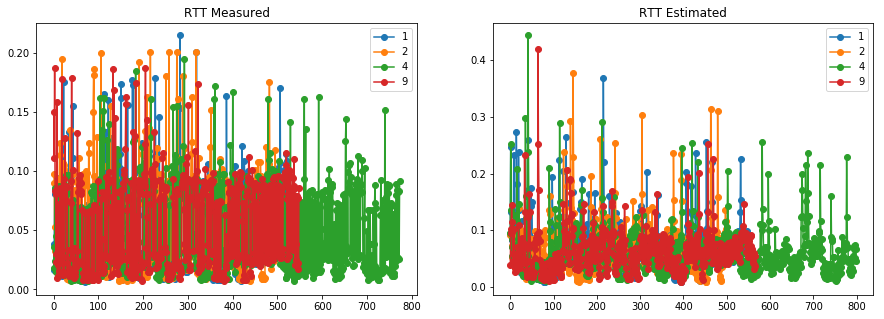

In [172]:
plot_rtts("results_3") # alpha =0.2

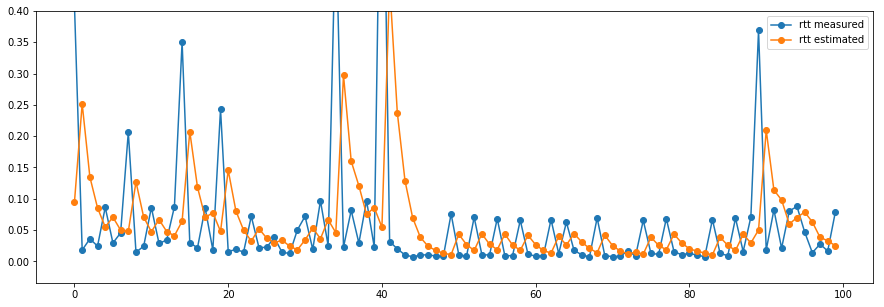

In [198]:
rtts_measured, rtts_estimated, rtts = get_rtts("results_3")

#plt.subplot(1,2,1)
plt.plot(rtts_measured[4][0:100], 'o-', label="rtt measured");
plt.ylim(ymax=0.4)
#plt.legend();

#plt.subplot(1,2,2)
plt.plot(rtts_estimated[4][0:100], 'o-', label="rtt estimated");
plt.legend();

### RTT Machine Learning with evenly distributed experts

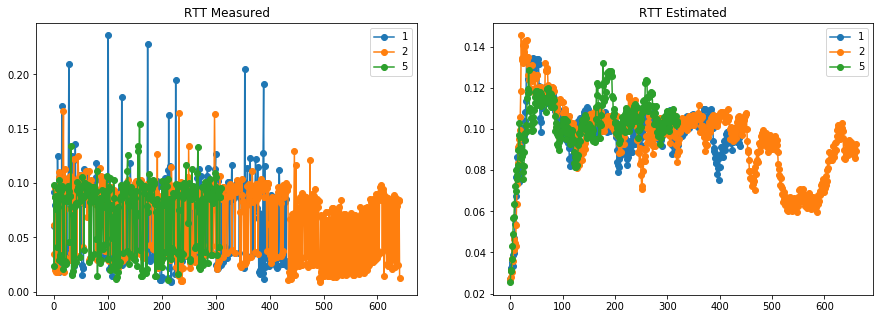

In [181]:
plot_rtts("results_4") # RTT ML . exp distribution of experts

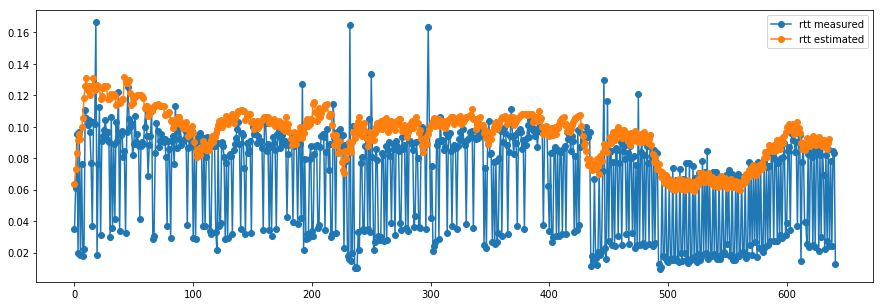

In [182]:
rtts_measured, rtts_estimated, rtts = get_rtts("results_4")

#plt.subplot(1,2,1)
plt.plot(reject_outliers(rtts_measured[2]), 'o-', label="rtt measured");
#plt.legend();

#plt.subplot(1,2,2)
plt.plot(reject_outliers(rtts_estimated[2]), 'o-', label="rtt estimated");
plt.legend();